In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import datetime

options = Options()
options.headless = True

driver = webdriver.Chrome(options=options, service=ChromeService(
    ChromeDriverManager().install()))


In [3]:
wiki_url = 'https://id.wikipedia.org/wiki/Daftar_kabupaten_di_Indonesia'

In [4]:
driver.get(wiki_url)
kab = driver.find_elements(
    By.CSS_SELECTOR, '.wikitable.sortable tbody tr')


In [5]:
kab_list = []
for k in kab:
    kd_kemendagri = k.find_element(
        By.CSS_SELECTOR, 'td:nth-child(1)').get_attribute('innerHTML')
    nm_kab = k.find_element(
        By.CSS_SELECTOR, 'td:nth-child(2) a').get_attribute('innerHTML')
    prov = k.find_element(
        By.CSS_SELECTOR, 'td:nth-child(3) a').get_attribute('innerHTML')
    pusat_kab = k.find_element(
        By.CSS_SELECTOR, 'td:nth-child(4)').text
    kab_list.append({
        'kd_kab': kd_kemendagri,
        'prov': prov,
        'kab': nm_kab,
        'pusat_kab': pusat_kab
    })
    print(f"{nm_kab}")


Kabupaten Aceh Barat Daya
Kabupaten Aceh Barat
Kabupaten Aceh Besar
Kabupaten Aceh Jaya
Kabupaten Aceh Selatan
Kabupaten Aceh Singkil
Kabupaten Aceh Tamiang
Kabupaten Aceh Tengah
Kabupaten Aceh Tenggara
Kabupaten Aceh Timur
Kabupaten Aceh Utara
Kabupaten Agam
Kabupaten Alor
Kabupaten Asahan
Kabupaten Asmat
Kabupaten Badung
Kabupaten Balangan
Kabupaten Bandung Barat
Kabupaten Bandung
Kabupaten Banggai
Kabupaten Banggai Kepulauan
Kabupaten Banggai Laut
Kabupaten Bangka Barat
Kabupaten Bangka Selatan
Kabupaten Bangka Tengah
Kabupaten Bangka
Kabupaten Bangkalan
Kabupaten Bangli
Kabupaten Banjar
Kabupaten Banjarnegara
Kabupaten Bantaeng
Kabupaten Bantul
Kabupaten Banyuasin
Kabupaten Banyumas
Kabupaten Banyuwangi
Kabupaten Barito Kuala
Kabupaten Barito Selatan
Kabupaten Barito Timur
Kabupaten Barito Utara
Kabupaten Barru
Kabupaten Batang
Kabupaten Batanghari
Kabupaten Batubara
Kabupaten Bekasi
Kabupaten Belitung Timur
Kabupaten Belitung
Kabupaten Belu
Kabupaten Bener Meriah
Kabupaten Bengkal

In [6]:
url2 = 'https://id.wikipedia.org/wiki/Daftar_kota_di_Indonesia_menurut_provinsi'
driver.get(url2)
kotas = driver.find_elements(
    By.CSS_SELECTOR, '.wikitable.sortable tbody tr')

In [7]:
kota_list = []
for k in kotas:
    nm_kota = k.find_element(
        By.CSS_SELECTOR, 'td:nth-child(3) a').get_attribute('innerHTML')
    prov = k.find_element(
        By.CSS_SELECTOR, 'td:nth-child(2) a').get_attribute('innerHTML')
    kota_list.append({
        'kd_kab': None,
        'prov': prov,
        'kab': f"Kota {nm_kota}",
        'pusat_kab': None
    })
    print(f"{nm_kota}")


Banda Aceh
Langsa
Lhokseumawe
Sabang
Subulussalam
Denpasar
Pangkalpinang
Cilegon
Serang
Tangerang Selatan
Tangerang
Bengkulu
Yogyakarta
Gorontalo
Kota Administrasi Jakarta Barat
Kota Administrasi Jakarta Pusat
Kota Administrasi Jakarta Selatan
Kota Administrasi Jakarta Timur
Kota Administrasi Jakarta Utara
Sungai Penuh
Jambi
Bandung
Bekasi
Bogor
Cimahi
Cirebon
Depok
Sukabumi
Tasikmalaya
Banjar
Magelang
Pekalongan
Salatiga
Semarang
Surakarta
Tegal
Batu
Blitar
Kediri
Madiun
Malang
Mojokerto
Pasuruan
Probolinggo
Surabaya
Pontianak
Singkawang
Banjarbaru
Banjarmasin
Palangka Raya
Balikpapan
Bontang
Samarinda
Nusantara
Tarakan
Batam
Tanjungpinang
Bandar Lampung
Metro
Ternate
Tidore Kepulauan
Ambon
Tual
Bima
Mataram
Kupang
Sorong
Jayapura
Dumai
Pekanbaru
Makassar
Palopo
Parepare
Palu
Baubau
Kendari
Bitung
Kotamobagu
Manado
Tomohon
Bukittinggi
Padang
Padang Panjang
Pariaman
Payakumbuh
Sawahlunto
Solok
Lubuklinggau
Pagar Alam
Palembang
Prabumulih
Binjai
Gunungsitoli
Medan
Padangsidimpuan
Pemata

In [8]:
kab_kota_list = kab_list + kota_list
kab_kota_df = pd.DataFrame(kab_kota_list)
kab_kota_df.to_excel('../../data/kab_kota.xlsx')

In [10]:
url3 = 'https://id.wikipedia.org/wiki/Daftar_kabupaten_dan_kota_di_Indonesia'
driver.get(url3)
kkk = driver.find_elements(
    By.CSS_SELECTOR, '.wikitable.sortable.mw-collapsible tbody tr')

In [13]:
kkk[0].find_element(By.CSS_SELECTOR,'td:nth-child(6)').text

'198.736'

In [15]:
kkk_list = []
for r in kkk:
    try:
        kab = r.find_element(By.CSS_SELECTOR, 'td:nth-child(2)').text
    except:
        kab = None
    try:
        pusat_kab = r.find_element(By.CSS_SELECTOR, 'td:nth-child(3)').text
    except:
        pusat_kab = None
    try:
        luas = r.find_element(By.CSS_SELECTOR, 'td:nth-child(5)').text
    except:
        luas = None
    try:
        jml_pend = r.find_element(By.CSS_SELECTOR, 'td:nth-child(6)').text
    except:
        jml_pend = None
    kkk_list.append({
        'kab': kab,
        'pusat_kab': pusat_kab,
        'luas': luas,
        'jml_pend': jml_pend
    })
    print(f"{kab}")


Kabupaten Aceh Barat
Kabupaten Aceh Barat Daya
Kabupaten Aceh Besar
Kabupaten Aceh Jaya
Kabupaten Aceh Selatan
Kabupaten Aceh Singkil
Kabupaten Aceh Tamiang
Kabupaten Aceh Tengah
Kabupaten Aceh Tenggara
Kabupaten Aceh Timur
Kabupaten Aceh Utara
Kabupaten Bener Meriah
Kabupaten Bireuen
Kabupaten Gayo Lues
Kabupaten Nagan Raya
Kabupaten Pidie
Kabupaten Pidie Jaya
Kabupaten Simeulue
Kota Banda Aceh
Kota Langsa
Kota Lhokseumawe
Kota Sabang
Kota Subulussalam
Kabupaten Asahan
Kabupaten Batu Bara
Kabupaten Dairi
Kabupaten Deli Serdang
Kabupaten Humbang Hasundutan
Kabupaten Karo
Kabupaten Labuhanbatu
Kabupaten Labuhanbatu Selatan
Kabupaten Labuhanbatu Utara
Kabupaten Langkat
Kabupaten Mandailing Natal
Kabupaten Nias
Kabupaten Nias Barat
Kabupaten Nias Selatan
Kabupaten Nias Utara
Kabupaten Padang Lawas
Kabupaten Padang Lawas Utara
Kabupaten Pakpak Bharat
Kabupaten Samosir
Kabupaten Serdang Bedagai
Kabupaten Simalungun
Kabupaten Tapanuli Selatan
Kabupaten Tapanuli Tengah
Kabupaten Tapanuli Utar

In [16]:
kkk_df = pd.DataFrame(kkk_list)
kkk_df.to_excel('../../data/kkk.xlsx')

In [33]:
k1 = pd.read_excel('../../data/kab_kota.xlsx',index_col=0)
k2 = pd.read_excel('../../data/kkk.xlsx',index_col=0)
km = k1.merge(k2[['kab','luas','jml_pend']],on='kab',how='left')

In [46]:
km['luas'] = km['luas'].map(lambda x: float(
    x.replace('.', '').replace(',', '.')))
km['jml_pend'] = km['jml_pend'].map(
    lambda x: int(x.replace('.', '').replace(' ', '')))


In [49]:
km['density'] = km['jml_pend']/km['luas']

In [60]:
km.to_excel('../../data/km.xlsx')

In [59]:
km.sort_values('density', ascending=False)


,kd_kab,prov,kab,pusat_kab,luas,jml_pend,density
60,NaN,Jakarta,Kota Administrasi Jakarta Pusat,NaN,52.38,1056896,20177.472318
59,NaN,Jakarta,Kota Administrasi Jakarta Barat,NaN,124.44,2434511,19563.733526
62,NaN,Jakarta,Kota Administrasi Jakarta Timur,NaN,182.70,3037139,16623.639847
93,NaN,Jawa Barat,Kota Bandung,NaN,167.67,2444160,14577.205225
96,NaN,Jawa Barat,Kota Cimahi,NaN,39.27,568700,14481.792717
...,...,...,...,...,...,...,...
344,91.16,Papua Selatan,Kabupaten Boven Digoel,Tanah Merah,27108.00,64285,2.371440
318,91.10,Papua,Kabupaten Sarmi,Sarmi,17742.00,41515,2.339928
228,65.02,Kalimantan Utara,Kabupaten Malinau,Malinau,42620.70,82500,1.935679
220,64.11,Kalimantan Timur,Kabupaten Mahakam Ulu,Batu Bulan,15315.00,24455,1.596801


In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from highlight_text import fig_text, ax_text

from PIL import Image
import urllib

plt.style.use('../../assets/stylesheets/soc_base.mplstyle')

Text(0, 0.5, 'Luas')

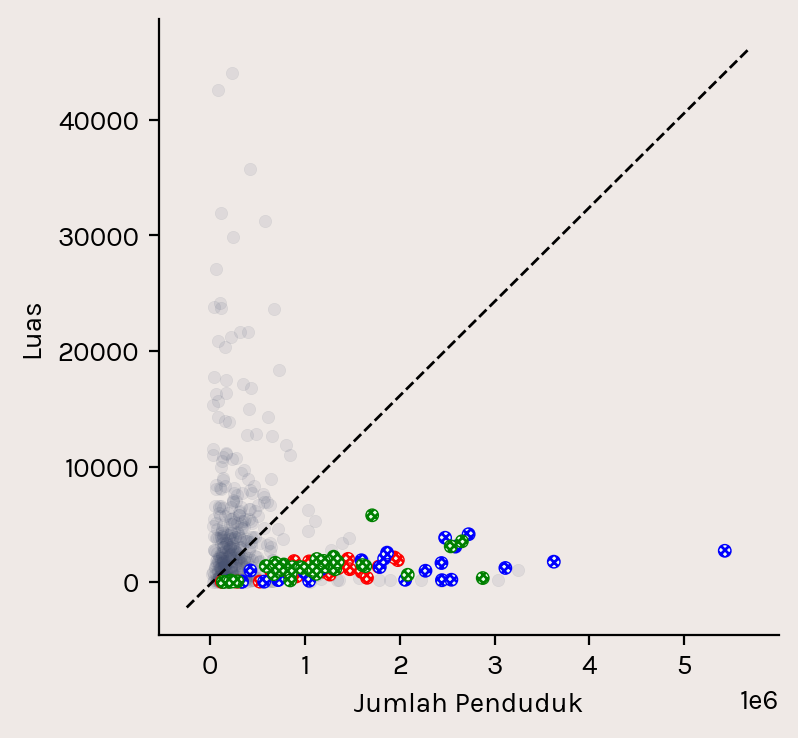

In [112]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = plt.subplot(111)
df = km.copy()
ax.scatter(
    df[df['prov']=='Jawa Tengah']['jml_pend'],
    df[df['prov']=='Jawa Tengah']['luas'],
    alpha=1, lw=.5, ec='red', fc='#efe',
    zorder=3, s=20,hatch='xxxxxxxx'
)
ax.scatter(
    df[df['prov']=='Jawa Barat']['jml_pend'],
    df[df['prov']=='Jawa Barat']['luas'],
    alpha=1, lw=.5, ec='blue', fc='#efe',
    zorder=3, s=20,hatch='xxxxxxxx'
)
ax.scatter(
    df[df['prov']=='Jawa Timur']['jml_pend'],
    df[df['prov']=='Jawa Timur']['luas'],
    alpha=1, lw=.5, ec='green', fc='#efe',
    zorder=3, s=20,hatch='xxxxxxxx'
)

ax.scatter(
    df['jml_pend'],
    df['luas'],
    alpha=.1, lw=.2, zorder=1,
    s=20
)
ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls='--', color='black', lw=1, zorder=2
)
# ax.set_xlim(0,ax.get_xlim()[1])
# ax.set_ylim(0,ax.get_ylim()[1])
ax.set_xlabel('Jumlah Penduduk')
ax.set_ylabel('Luas')
